In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df["sex"].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [8]:
df["smoker"].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [9]:
df["region"].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [10]:
cat_cols = df.select_dtypes(include="object").columns

In [11]:
num_cols = df.select_dtypes(include=["float", "int"]).columns

In [12]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [13]:
df["children"].max()

5

In [14]:
df["children"].min()

0

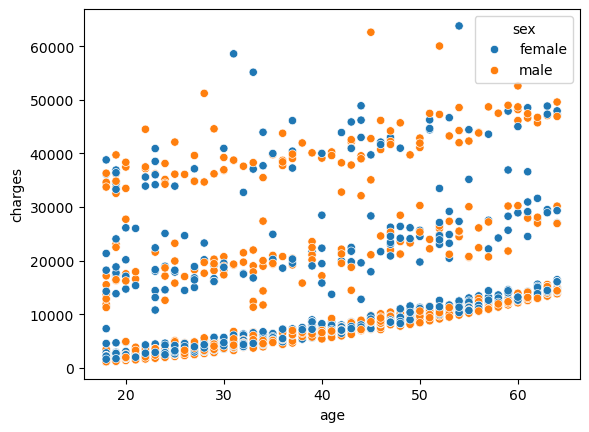

In [15]:
sns.scatterplot(x=df["age"], y=df["charges"], hue=df["sex"])
plt.show()

In [16]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

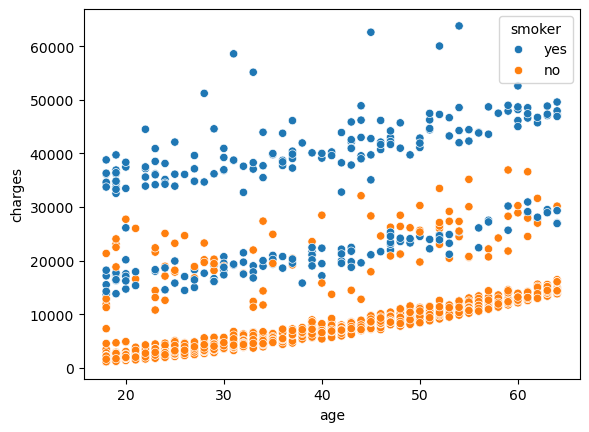

In [17]:
sns.scatterplot(x=df["age"], y=df["charges"], hue=df["smoker"])
plt.show()

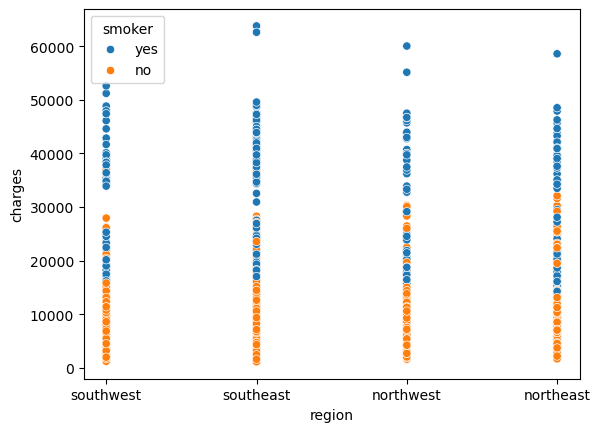

In [18]:
sns.scatterplot(x=df["region"], y=df["charges"], hue=df["smoker"])
plt.show()

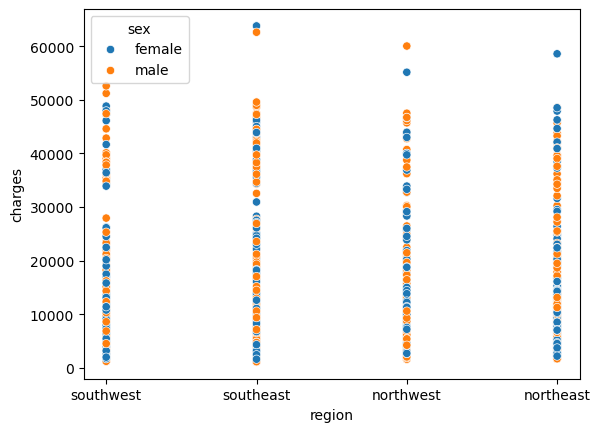

In [19]:
sns.scatterplot(x=df["region"], y=df["charges"], hue=df["sex"])
plt.show()

In [20]:
df.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


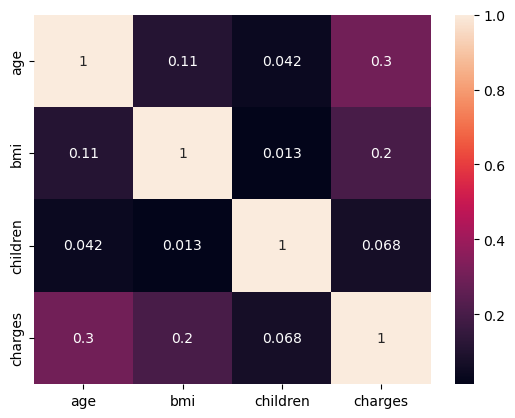

In [21]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

In [22]:
from sklearn.preprocessing import OneHotEncoder

In [23]:
cat_cols

Index(['sex', 'smoker', 'region'], dtype='object')

In [24]:
# Label encoding
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})

In [25]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [26]:
df = pd.get_dummies(df, columns=['region'], drop_first=True)

In [27]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,True
1,18,0,33.770,1,0,1725.55230,False,True,False
2,28,0,33.000,3,0,4449.46200,False,True,False
3,33,0,22.705,0,0,21984.47061,True,False,False
4,32,0,28.880,0,0,3866.85520,True,False,False


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X = df.drop("charges", axis=1)
y = df["charges"]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [31]:
print(f"X train shape: {X_train.shape} \nX test shape: {X_test.shape} \ny train shape: {y_train.shape} \ny test shape: {y_test.shape}")

X train shape: (1003, 8) 
X test shape: (335, 8) 
y train shape: (1003,) 
y test shape: (335,)


In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
col_names = X_train.columns

In [34]:
col_names

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=col_names)

In [37]:
X_train_scaled.head()

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
0,0.286917,1.011028,2.506536,-0.916954,1.920134,-0.562382,1.631130,-0.577734
1,0.216487,1.011028,0.383077,-0.077807,-0.520797,-0.562382,-0.613072,-0.577734
2,-1.473839,-0.989092,1.987270,-0.916954,-0.520797,-0.562382,1.631130,-0.577734
3,0.850359,-0.989092,-0.125609,-0.077807,-0.520797,-0.562382,1.631130,-0.577734
4,-1.403409,1.011028,-0.309550,-0.916954,-0.520797,-0.562382,-0.613072,1.730900


In [38]:
X_test_scaled.head()

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
0,0.357348,-0.989092,-0.173629,0.761340,-0.520797,-0.562382,-0.613072,-0.577734
1,-1.473839,1.011028,1.542881,-0.916954,-0.520797,-0.562382,-0.613072,-0.577734
2,-0.487816,-0.989092,-0.436518,2.439634,1.920134,1.778152,-0.613072,-0.577734
3,0.286917,-0.989092,-1.237393,-0.916954,-0.520797,-0.562382,-0.613072,1.730900
4,-1.192118,-0.989092,-0.915904,-0.916954,-0.520797,1.778152,-0.613072,-0.577734


In [39]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [40]:
models = {
    "Linear Regression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "SVM Regressor" : SVR(),
    "K Neighbors Regressor" : KNeighborsRegressor(),
    "Decision Tree Regressor" : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor(),
    "Adaboost Regressor" : AdaBoostRegressor(),
    "Gradient Boosting Regressor" : GradientBoostingRegressor(),
    "XGBoost Regressor" : XGBRegressor(),
    "LightGBM Regressor" : LGBMRegressor()
}
    

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [42]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_squared = r2_score(true, predicted)

    return mae, mse, rmse, r2_squared

In [43]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_scaled, y_train)

    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    print("Model Performance for Training Set")
    print("R2 Score: ", model_train_r2)
    print("Mean Squared Error: ", model_train_mse)
    print("Root Mean Squared Error: ", model_train_rmse)
    print("Mean Absolute Error: ", model_train_mae)
    print("-------------------------------------------")
    print("Model Performance for Test Set")
    print("R2 Score: ", model_test_r2)
    print("Mean Square Error: ", model_test_mse)
    print("Root Mean Squared Error: ", model_test_rmse)
    print("Mean Absolute Error: ", model_test_mae)
    print("-------------------------------------------")
    print("\n")

Linear Regression
Model Performance for Training Set
R2 Score:  0.7678120782775301
Mean Squared Error:  34949790.64707512
Root Mean Squared Error:  5911.834795313137
Mean Absolute Error:  4139.5727638925455
-------------------------------------------
Model Performance for Test Set
R2 Score:  0.6908753357757642
Mean Square Error:  41525886.58280326
Root Mean Squared Error:  6444.058238625971
Mean Absolute Error:  4311.092308479659
-------------------------------------------


Lasso
Model Performance for Training Set
R2 Score:  0.7678119797183044
Mean Squared Error:  34949805.4825768
Root Mean Squared Error:  5911.836050042051
Mean Absolute Error:  4139.537740939302
-------------------------------------------
Model Performance for Test Set
R2 Score:  0.6908741626553124
Mean Square Error:  41526044.172515325
Root Mean Squared Error:  6444.070466135153
Mean Absolute Error:  4311.005887322288
-------------------------------------------


Ridge
Model Performance for Training Set
R2 Score:  0

In [44]:
# hyperparameter tuning

In [45]:
xgboost_params = {
    "learning_rate" : [0.1, 0.01],
    "max_depth" : [5, 8, 12, 20, 30],
    "n_estimators" : [100, 200, 300, 500],
    "colsample_bytree" : [0.3, 0.4, 0.5, 0.7, 1]
}

ligthgbm_params = {
    "num_leaves" : [31, 50, 70],
    "max_depth" : [-1, 5, 10],
    "learning_rate" : [0.01, 0.05, 0.1],
    "n_estimators" : [100, 300, 1000],
    "min_child_samples" : [10, 20, 30],
    "subsample" : [0.6, 0.8, 1.0],
    "colsample_bytree" : [0.6, 0.8, 1.0],
    "reg_alpha" : [0, 0.5, 1.0],
    "reg_lambda" : [0, 0.5, 1.0]
}  

gradient_params = {
    "n_estimators" : [100, 150, 200],
    "max_depth" : [3, 4, 5],
    "loss" : ["squared_error", "absolute_error", "huber", "quantile"],
    "learning_rate" : [0.01, 0.1, .5]
}

adaboost_params = {
    "n_estimators" : [50, 80, 100, 120],
    "learning_rate" : [0.001, 0.01, 0,1, 1.0, 2.0],
    "loss" : ["linear", "square", "exponential"]
}

random_params = {
    "max_depth" : [5, 8, 10, 15, None],
    "max_features" : ["sqrt", "log2", 5, 7, 10],
    "min_samples_split" : [2, 8, 12, 20],
    "n_estimators" : [100, 200, 500, 1000]
}

In [46]:
from sklearn.model_selection import RandomizedSearchCV

In [47]:
randomcv_models = [
    ("Random Forest Regressor", RandomForestRegressor(), random_params),
    ("Adaboost Regressor", AdaBoostRegressor(), adaboost_params),
    ("Gradient Boosting Regressor", GradientBoostingRegressor(), gradient_params),
    ("XGBoost Regressor", XGBRegressor(), xgboost_params),
    ("LigthGBM Regressor", LGBMRegressor(verbosity=-1), ligthgbm_params)
]

In [48]:
for name, model, params in randomcv_models:
    print(name)

Random Forest Regressor
Adaboost Regressor
Gradient Boosting Regressor
XGBoost Regressor
LigthGBM Regressor


In [49]:
for name, model, params in randomcv_models:
    print(model)

RandomForestRegressor()
AdaBoostRegressor()
GradientBoostingRegressor()
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)
LGBMRegressor(verbosity=-1)


In [50]:
for name, model, params in randomcv_models:
    print(params)

{'max_depth': [5, 8, 10, 15, None], 'max_features': ['sqrt', 'log2', 5, 7, 10], 'min_samples_split': [2, 8, 12, 20], 'n_estimators': [100, 200, 500, 1000]}
{'n_estimators': [50, 80, 100, 120], 'learning_rate': [0.001, 0.01, 0, 1, 1.0, 2.0], 'loss': ['linear', 'square', 'exponential']}
{'n_estimators': [100, 150, 200], 'max_depth': [3, 4, 5], 'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'], 'learning_rate': [0.01, 0.1, 0.5]}
{'learning_rate': [0.1, 0.01], 'max_depth': [5, 8, 12, 20, 30], 'n_estimators': [100, 200, 300, 500], 'colsample_bytree': [0.3, 0.4, 0.5, 0.7, 1]}
{'num_leaves': [31, 50, 70], 'max_depth': [-1, 5, 10], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 300, 1000], 'min_child_samples': [10, 20, 30], 'subsample': [0.6, 0.8, 1.0], 'colsample_bytree': [0.6, 0.8, 1.0], 'reg_alpha': [0, 0.5, 1.0], 'reg_lambda': [0, 0.5, 1.0]}


In [51]:
import warnings
warnings.filterwarnings("ignore")

In [52]:
for name, model, params in randomcv_models:
    randomcv = RandomizedSearchCV(estimator=model, param_distributions=params, n_iter=100, cv=3, n_jobs=-1)
    randomcv.fit(X_train, y_train)
    print("Best Params for :", name, randomcv.best_params_)

Best Params for : Random Forest Regressor {'n_estimators': 1000, 'min_samples_split': 8, 'max_features': 5, 'max_depth': 5}
Best Params for : Adaboost Regressor {'n_estimators': 50, 'loss': 'square', 'learning_rate': 0.001}
Best Params for : Gradient Boosting Regressor {'n_estimators': 100, 'max_depth': 3, 'loss': 'huber', 'learning_rate': 0.1}
Best Params for : XGBoost Regressor {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 1}
Best Params for : LigthGBM Regressor {'subsample': 0.6, 'reg_lambda': 0.5, 'reg_alpha': 0.5, 'num_leaves': 50, 'n_estimators': 100, 'min_child_samples': 30, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 1.0}


In [53]:
models = {
    "Random Forest Regressor" : RandomForestRegressor(n_estimators = 500, min_samples_split=2, max_features = 5, max_depth = 5),
    "Adaboost Regressor" : AdaBoostRegressor(n_estimators=80, loss="linear", learning_rate=0.001),
    "Gradient Boosting Regressor" : GradientBoostingRegressor(n_estimators=100, max_depth=3, loss="huber", learning_rate=0.1),
    "XGBoost Regressor" : XGBRegressor(n_estimators=300, max_depth=5, learning_rate=0.01, colsample_bytree=1),
    "LigthGBM Regressor" : LGBMRegressor(verbosity=-1, subsample=0.8, reg_lambda=1.0, reg_alpha=1.0, num_leaves=50, n_estimators=300, min_child_samples=20, max_depth=5, learning_rate=0.01, colsample_bytree=1.0)
}

In [54]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_scaled, y_train)

    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    print("Model Performance for Training Set")
    print("R2 Score: ", model_train_r2)
    print("Mean Squared Error: ", model_train_mse)
    print("Root Mean Squared Error: ", model_train_rmse)
    print("Mean Absolute Error: ", model_train_mae)
    print("-------------------------------------------")
    print("Model Performance for Test Set")
    print("R2 Score: ", model_test_r2)
    print("Mean Square Error: ", model_test_mse)
    print("Root Mean Squared Error: ", model_test_rmse)
    print("Mean Absolute Error: ", model_test_mae)
    print("-------------------------------------------")
    print("\n")

Random Forest Regressor
Model Performance for Training Set
R2 Score:  0.8964721996615072
Mean Squared Error:  15583390.045186663
Root Mean Squared Error:  3947.5802772314414
Mean Absolute Error:  2195.1137702429337
-------------------------------------------
Model Performance for Test Set
R2 Score:  0.8200852483324862
Mean Square Error:  24168629.80204944
Root Mean Squared Error:  4916.16006676445
Mean Absolute Error:  2696.5976171335046
-------------------------------------------


Adaboost Regressor
Model Performance for Training Set
R2 Score:  0.8728394966922767
Mean Squared Error:  19140672.504462764
Root Mean Squared Error:  4375.00542907809
Mean Absolute Error:  2649.348700779694
-------------------------------------------
Model Performance for Test Set
R2 Score:  0.8082537373896672
Mean Square Error:  25758001.464604005
Root Mean Squared Error:  5075.234129043113
Mean Absolute Error:  2909.1172454957446
-------------------------------------------


Gradient Boosting Regressor
Mo